In [1]:
#Load Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore")


In [2]:
#Load Data
df_vehicle = pd.read_csv("data/vehicles.csv")
df_vehicle.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [3]:
df_vehicle.tail(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,NaN,sedan,white,wy
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


Data Analysis Steps

<Axes: >

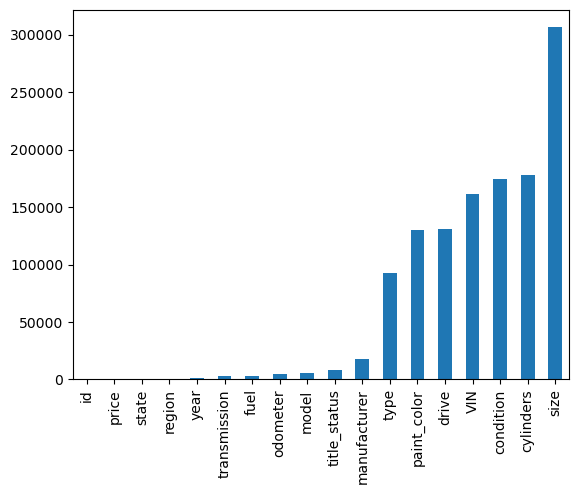

In [5]:
#count missing values
df_vehicle.isnull().sum().sort_values().plot(kind = 'bar')

In [6]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
#Drop identity columns and repetitive columns(region,state)
df_vehicle1 = df_vehicle.drop(columns=['id','VIN','state'])
df_vehicle1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


In [8]:
df_vehicle1 = df_vehicle1.drop_duplicates()

In [9]:
#count unique values
df_vehicle1.nunique()

region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
dtype: int64

In [10]:
#descriptive statistics for numerical variables
df_vehicle1.describe()

,price,year,odometer
count,3.700060e+05,369020.000000,3.665600e+05
mean,8.426751e+04,2011.072758,9.720563e+04
std,1.308502e+07,9.808597,2.118151e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.995000e+03,2008.000000,3.571900e+04
50%,1.425000e+04,2013.000000,8.356050e+04
75%,2.699000e+04,2017.000000,1.333315e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [11]:
#Convert object datatypes
df_vehicle1 = df_vehicle1.convert_dtypes()
cat_columns =  ['condition','fuel','title_status','transmission','drive','manufacturer','model','region','type','paint_color','size','cylinders']
df_vehicle1[cat_columns] = df_vehicle1[cat_columns].fillna('Unknown')
df_vehicle1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370006 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        370006 non-null  string
 1   price         370006 non-null  Int64 
 2   year          369020 non-null  Int64 
 3   manufacturer  370006 non-null  string
 4   model         370006 non-null  string
 5   condition     370006 non-null  string
 6   cylinders     370006 non-null  string
 7   fuel          370006 non-null  string
 8   odometer      366560 non-null  Int64 
 9   title_status  370006 non-null  string
 10  transmission  370006 non-null  string
 11  drive         370006 non-null  string
 12  size          370006 non-null  string
 13  type          370006 non-null  string
 14  paint_color   370006 non-null  string
dtypes: Int64(3), string(12)
memory usage: 46.2 MB


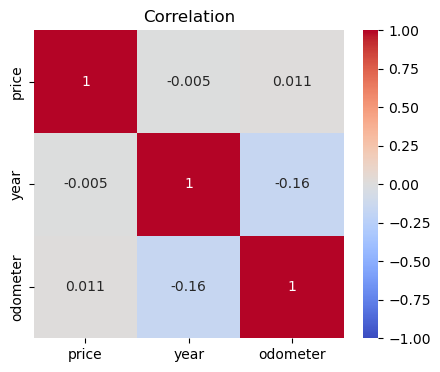

In [12]:
# Fill missing values and plot numerical features correlation
num_columns = df_vehicle1.select_dtypes(include=['float64', 'int64'])

df_vehicle1['year'] = df_vehicle1['year'].fillna(0)
df_vehicle1['odometer'] = df_vehicle1['odometer'].fillna(0)

# Create a correlation heatmap using just the numerical features
plt.figure(figsize=(5, 4))
sns.heatmap(num_columns.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation')
plt.show()

In [13]:
df_vehicle1.describe()

,price,year,odometer
count,370006.0,370006.0,370006.0
mean,84267.509984,2005.713607,96300.317149
std,13085017.08379,104.138858,211033.054047
min,0.0,0.0,0.0
25%,5995.0,2008.0,34723.0
50%,14250.0,2013.0,82700.0
75%,26990.0,2017.0,132908.0
max,3736928711.0,2022.0,10000000.0


In [14]:
print(df_vehicle1.isnull().sum())

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64


In [15]:
for column in df_vehicle1.columns:
    print(f"Value counts for column '{column}':")
    print(df_vehicle1[column].value_counts(dropna=False))
    print()

Value counts for column 'region':
region
minneapolis / st paul    2940
seattle-tacoma           2915
portland                 2895
denver                   2874
sacramento               2840
                         ... 
meridian                   28
southwest MS               14
kansas city                11
fort smith, AR              9
west virginia (old)         8
Name: count, Length: 404, dtype: Int64

Value counts for column 'price':
price
0        25649
29990     2643
6995      2615
4500      2569
7995      2544
         ...  
10893        1
32856        1
25938        1
19736        1
17873        1
Name: count, Length: 15655, dtype: Int64

Value counts for column 'year':
year
2018    32576
2017    31234
2015    26450
2013    25887
2016    25787
        ...  
1943        1
1915        1
1902        1
1905        1
1909        1
Name: count, Length: 115, dtype: Int64

Value counts for column 'manufacturer':
manufacturer
ford               61177
chevrolet          47415
toyota   

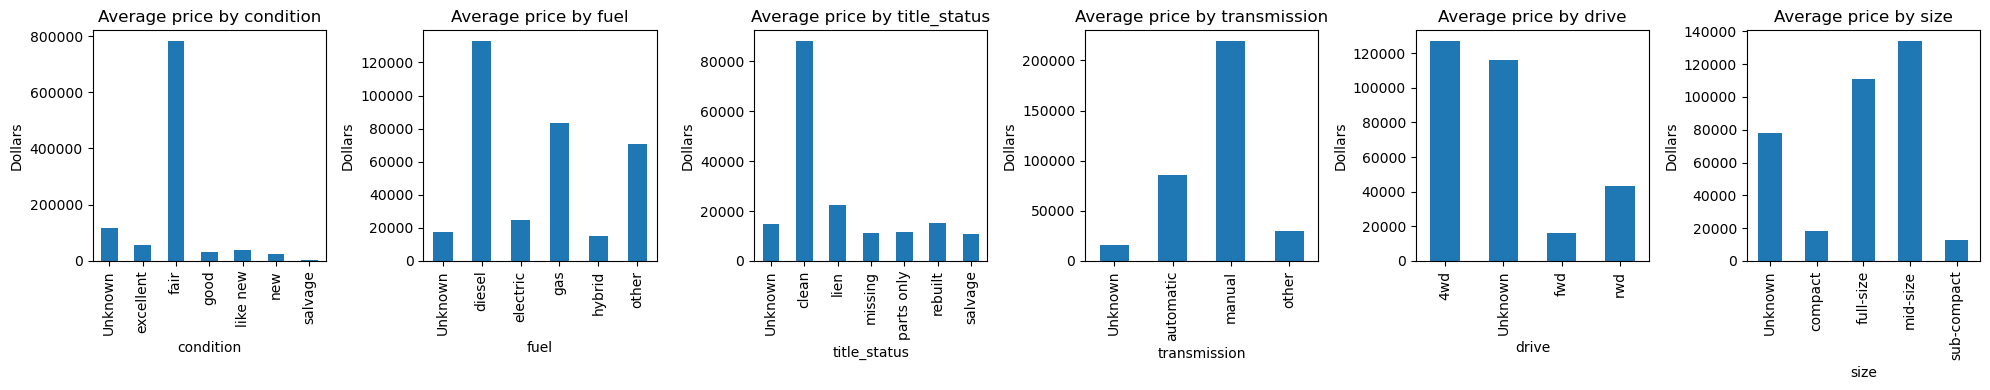

In [16]:
#for visualizing categorical values with minimal unique values
categorical_columns = ['condition','fuel','title_status','transmission','drive','size']
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

for i, column in enumerate(categorical_columns):
    mean_price = df_vehicle1.groupby(column)['price'].mean()
    mean_price.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Average price by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dollars')

plt.tight_layout()
plt.show()

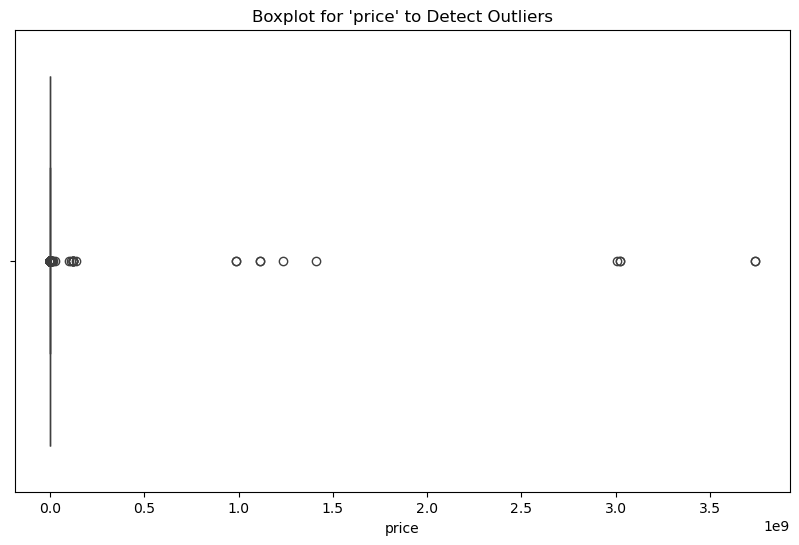

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_vehicle1['price']) 
plt.title("Boxplot for 'price' to Detect Outliers")
plt.show()

Preprocessing Steps

In [19]:
#identify outliers for price column
Q1 = df_vehicle1['price'].quantile(0.25)
Q3 = df_vehicle1['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outlier data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)
# Identify outliers
df_vehicle1 = df_vehicle1[(df_vehicle1['price'] > lower_bound) & (df_vehicle1['price'] < upper_bound)]
print("Outliers based on IQR:\n", df_vehicle1)

-25497.5 58482.5
Outliers based on IQR:
                         region  price  year manufacturer  \
0                     prescott   6000     0      Unknown   
1                 fayetteville  11900     0      Unknown   
2                 florida keys  21000     0      Unknown   
3       worcester / central MA   1500     0      Unknown   
4                   greensboro   4900     0      Unknown   
...                        ...    ...   ...          ...   
426875                 wyoming  23590  2019       nissan   
426876                 wyoming  30590  2020        volvo   
426877                 wyoming  34990  2020     cadillac   
426878                 wyoming  28990  2018        lexus   
426879                 wyoming  30590  2019          bmw   

                           model condition    cylinders     fuel  odometer  \
0                        Unknown   Unknown      Unknown  Unknown         0   
1                        Unknown   Unknown      Unknown  Unknown         0   
2   

In [20]:
#Subset data to exclude missing values in year and odometer to get a meaningful subset
df_vehicle1 = df_vehicle1[(df_vehicle1['year'] > 1900)]
df_vehicle1 = df_vehicle1[(df_vehicle1['odometer'] > 0) & (df_vehicle1['odometer'] < 1000000)]


In [21]:
print(df_vehicle1[['price', 'year', 'odometer']].describe())

              price         year      odometer
count      356917.0     356917.0      356917.0
mean   16821.495364  2011.049888  93261.126688
std    13146.873052     9.596864  71234.946477
min             0.0       1901.0           1.0
25%          5995.0       2008.0       37641.0
50%         13995.0       2013.0       85612.0
75%         25995.0       2017.0      134500.0
max         58448.0       2022.0      999999.0


In [22]:
print(df_vehicle1.isnull().sum())

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64


In [23]:
#convert string and category columns to integer
cat_columns =  ['condition','fuel','title_status','transmission','drive','type','paint_color','size','cylinders','manufacturer','model','region']
num_columns = ['year','odometer']

#num column impute
imputer_num = SimpleImputer(strategy='median')
df_vehicle1[num_columns] = df_vehicle1[num_columns].replace(0,np.nan)
df_vehicle1[num_columns] = imputer_num.fit_transform(df_vehicle1[num_columns])
print(df_vehicle1.isnull().sum())

imputer_cat = SimpleImputer(strategy='most_frequent')
df_vehicle1[cat_columns] = df_vehicle1[cat_columns].replace(0,np.nan)
df_vehicle1[cat_columns] = imputer_cat.fit_transform(df_vehicle1[cat_columns])
print(df_vehicle1)
    

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64
         region  price    year manufacturer                     model  \
27       auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
28       auburn  22590  2010.0    chevrolet            silverado 1500   
29       auburn  39590  2020.0    chevrolet       silverado 1500 crew   
30       auburn  30990  2017.0       toyota      tundra double cab sr   
31       auburn  15000  2013.0         ford                 f-150 xlt   
...         ...    ...     ...          ...                       ...   
426875  wyoming  23590  2019.0       nissan         maxima s sedan 4d   
426876  wyoming  30590  2020.0        volvo  s60 t5 momentum sedan 4d   
426877  wyoming  34990  2020.0     cadillac          xt4 spo

In [24]:
#Categorical columns
#Encoding categorical columns using labelEncoder
label_encoder = LabelEncoder()
for col in cat_columns:
    # Apply LabelEncoder to each column individually
   df_vehicle1[col] = label_encoder.fit_transform(df_vehicle1[[col]])

df_vehicle1

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,16,33590,2014.0,15,23088,3,6,3,57923.0,1,3,1,0,9,11
28,16,22590,2010.0,8,23445,3,6,3,71229.0,1,3,1,0,9,2
29,16,39590,2020.0,8,23492,3,6,3,19160.0,1,3,1,0,9,9
30,16,30990,2017.0,40,26428,3,6,3,41124.0,1,3,1,0,9,9
31,16,15000,2013.0,14,13728,1,5,3,128000.0,1,1,3,2,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019.0,32,18705,3,5,3,32226.0,1,3,2,0,10,0
426876,397,30590,2020.0,42,22396,3,7,3,12029.0,1,3,2,0,10,9
426877,397,34990,2020.0,7,27840,3,7,1,4174.0,1,3,1,0,5,11
426878,397,28990,2018.0,24,12745,3,5,3,30112.0,1,3,2,0,10,10


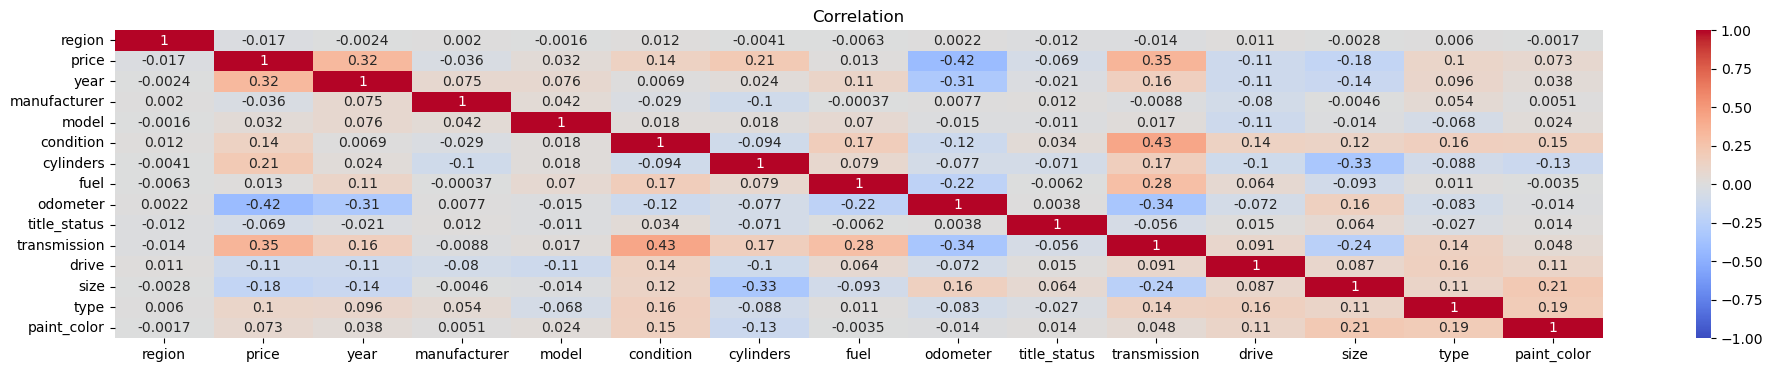

In [25]:
#Post impute and encoding visualization of correlation
num_columns = df_vehicle1.select_dtypes(include=['float64', 'int64','int32'])
# Create a correlation heatmap using just the numerical features
plt.figure(figsize=(24, 4))
sns.heatmap(num_columns.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation')
plt.show()

In [26]:
df_vehicle1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356917 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        356917 non-null  int32  
 1   price         356917 non-null  Int64  
 2   year          356917 non-null  float64
 3   manufacturer  356917 non-null  int32  
 4   model         356917 non-null  int32  
 5   condition     356917 non-null  int32  
 6   cylinders     356917 non-null  int32  
 7   fuel          356917 non-null  int32  
 8   odometer      356917 non-null  float64
 9   title_status  356917 non-null  int32  
 10  transmission  356917 non-null  int32  
 11  drive         356917 non-null  int32  
 12  size          356917 non-null  int32  
 13  type          356917 non-null  int32  
 14  paint_color   356917 non-null  int32  
dtypes: Int64(1), float64(2), int32(12)
memory usage: 27.6 MB


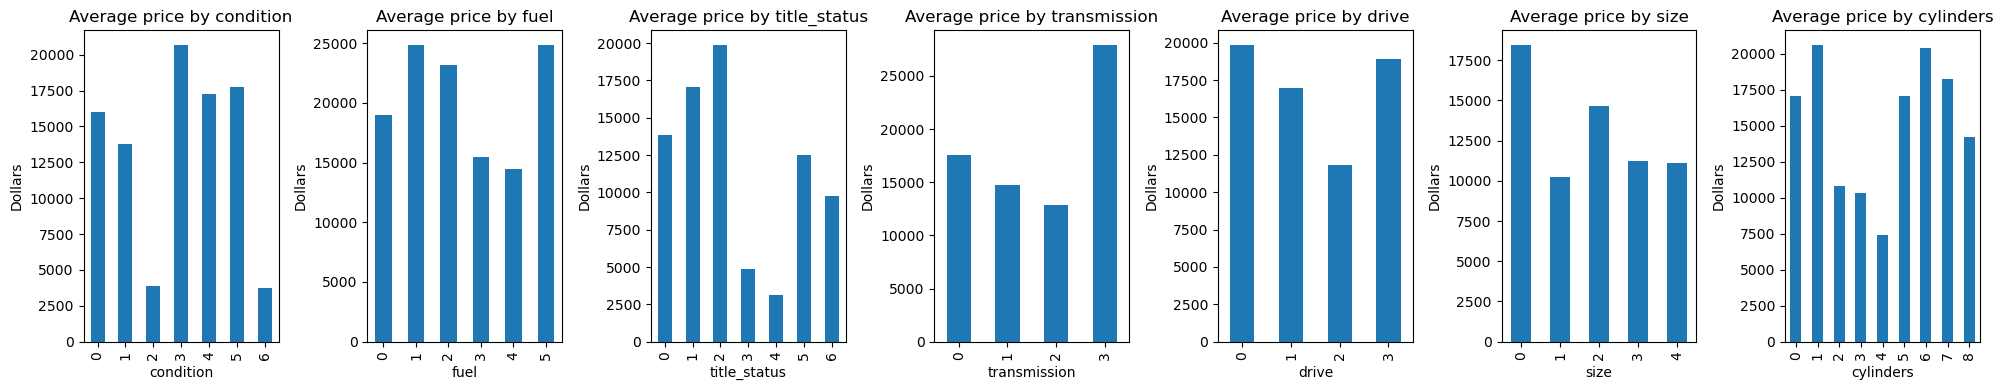

In [27]:
#post encoding and impute visualizing of categorical values with minimal unique values
categorical_columns = ['condition','fuel','title_status','transmission','drive','size','cylinders']
fig, axes = plt.subplots(1, 7, figsize=(20, 4))

for i, column in enumerate(categorical_columns):
    mean_price = df_vehicle1.groupby(column)['price'].mean()
    mean_price.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Average price by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dollars')

plt.tight_layout()
plt.show()

In [28]:
df_vehicle1

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,16,33590,2014.0,15,23088,3,6,3,57923.0,1,3,1,0,9,11
28,16,22590,2010.0,8,23445,3,6,3,71229.0,1,3,1,0,9,2
29,16,39590,2020.0,8,23492,3,6,3,19160.0,1,3,1,0,9,9
30,16,30990,2017.0,40,26428,3,6,3,41124.0,1,3,1,0,9,9
31,16,15000,2013.0,14,13728,1,5,3,128000.0,1,1,3,2,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019.0,32,18705,3,5,3,32226.0,1,3,2,0,10,0
426876,397,30590,2020.0,42,22396,3,7,3,12029.0,1,3,2,0,10,9
426877,397,34990,2020.0,7,27840,3,7,1,4174.0,1,3,1,0,5,11
426878,397,28990,2018.0,24,12745,3,5,3,30112.0,1,3,2,0,10,10


In [29]:
#Split data to train and test
# Define features (X) and target variable (y)

X = df_vehicle1.drop(['price'], axis=1)  # Features (excluding the target)
y = df_vehicle1['price']  # Scaled target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (285533, 14)
Test set size: (71384, 14)


In [30]:
X_train.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
145805,331,2007.0,0,1162,1,6,3,230837.0,1,1,0,0,9,9
211259,39,2016.0,17,10845,0,3,3,62690.0,1,1,0,0,0,9
39238,220,2020.0,22,24359,1,3,3,23864.0,1,1,2,0,13,9
149776,385,2006.0,9,37,1,5,3,97977.0,1,1,2,3,6,11
362148,363,2016.0,14,26000,0,5,3,123825.0,1,1,3,2,12,11


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285533 entries, 145805 to 147575
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        285533 non-null  int32  
 1   year          285533 non-null  float64
 2   manufacturer  285533 non-null  int32  
 3   model         285533 non-null  int32  
 4   condition     285533 non-null  int32  
 5   cylinders     285533 non-null  int32  
 6   fuel          285533 non-null  int32  
 7   odometer      285533 non-null  float64
 8   title_status  285533 non-null  int32  
 9   transmission  285533 non-null  int32  
 10  drive         285533 non-null  int32  
 11  size          285533 non-null  int32  
 12  type          285533 non-null  int32  
 13  paint_color   285533 non-null  int32  
dtypes: float64(2), int32(12)
memory usage: 19.6 MB


In [32]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 285533 entries, 145805 to 147575
Series name: price
Non-Null Count   Dtype
--------------   -----
285533 non-null  Int64
dtypes: Int64(1)
memory usage: 4.6 MB


In [33]:
#Scale and fit,transform training data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_vehicle1[['year', 'odometer']]) 


In [34]:
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [37]:
X_train_scaled_df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,1.167655,-0.421578,-1.577928,-1.953821,-0.323110,0.269198,-0.028785,1.926594,-0.15536,-0.515903,-1.194686,-0.595175,0.756186,0.929152
1,-1.316795,0.516222,-0.174418,-0.658677,-1.030739,-1.707817,-0.028785,-0.429055,-0.15536,-0.515903,-1.194686,-0.595175,-1.235580,0.929152
2,0.223223,0.933023,0.238379,1.148881,-0.323110,-1.707817,-0.028785,-0.972986,-0.15536,-0.515903,0.732597,-0.595175,1.641415,0.929152
3,1.627108,-0.525778,-0.834894,-2.104295,-0.323110,-0.389807,-0.028785,0.065297,-0.15536,-0.515903,0.732597,2.223289,0.092264,1.363084
4,1.439923,0.516222,-0.422096,1.368373,-1.030739,-0.389807,-0.028785,0.427414,-0.15536,-0.515903,1.696239,1.283801,1.420108,1.363084


In [38]:
model = LinearRegression().fit(X_train_scaled,y_train)

In [39]:
#Baseline Prediction
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train,y_train)
mse_baseline_test = mean_squared_error(baseline_test,y_test)
print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(285533,) (71384,)
Baseline for training data: 172904080.01875484
Baseline for testing data: 172582447.6226933


In [40]:

y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
#Determination Coefficient
print(f"R-squared (R²): {r2}")

Model Evaluation:
Mean Absolute Error (MAE): 8089.921633536004
Mean Squared Error (MSE): 115934567.77538289
R-squared (R²): 0.32823662329297976


region          -179.999277
year            2421.572851
manufacturer    -556.194111
model             52.904300
condition        709.186562
cylinders       1908.679645
fuel           -1903.091441
odometer       -3986.761726
title_status    -528.205189
transmission    2580.209568
drive          -1736.502731
size            -535.280226
type             663.622887
paint_color     1012.058773
dtype: float64


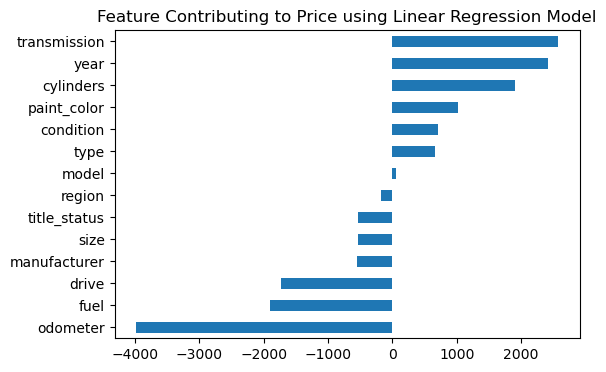

In [41]:
coef = pd.Series(model.coef_, index = X_train.columns)
print(coef)
featured_coef = coef.sort_values()
plt.figure(figsize=(6, 4))
featured_coef.plot(kind = "barh")
plt.title("Feature Contributing to Price using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

In [42]:
y_intercept = model.intercept_
print(y_intercept)

16824.40164534397


In [43]:
std_X=X.std()
std_Y = y.std()
print(std_X)
print(std_Y)


region            117.541981
year                9.596864
manufacturer       12.120890
model            7470.020834
condition           1.413757
cylinders           1.517860
fuel                0.782234
odometer        71234.946477
title_status        0.747067
transmission        0.764224
drive               1.036801
size                1.063853
type                4.518794
paint_color         4.606802
dtype: float64
13146.87305192309


In [44]:
unstandardized_coefficients = coef * (std_X / std_Y)
unstandardized_coefficients

region             -1.609316
year                1.767683
manufacturer       -0.512789
model              30.060093
condition           0.076263
cylinders           0.220365
fuel               -0.113233
odometer       -21601.848370
title_status       -0.030015
transmission        0.149987
drive              -0.136946
size               -0.043315
type                0.228098
paint_color         0.354636
dtype: float64

In [45]:
#FeatureSelection and preprocessing for cross validation
pipe = Pipeline([('scaler', scaler),
          ('linear', model)])
pipe.fit(X_train_scaled,y_train)
pipe.score(X_test_scaled,y_test)

0.32823662329297987

In [46]:
y_pred = pipe.predict(X_test_scaled)

In [47]:
#Evaluation
rmse = metrics.root_mean_squared_error(y_test, y_pred)
print("Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Model Evaluation:
Root Mean Squared Error (RMSE): 10767.29157102114


RMSE is a measure of the average magnitude of error between the model's predictions and the actual values. In this case,
RMSE of 10767.29, indicates model is off by $10767 of the predicted used car price.

In [49]:
y_train.mean()

16824.40164534397

In [50]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('linear', LinearRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'linear': LinearRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'linear__copy_X': True,
 'linear__fit_intercept': True,
 'linear__n_jobs': None,
 'linear__positive': False}

In [51]:
param_grid = {
    'linear__copy_X': [True, False],
    'linear__fit_intercept': [True, False]
}

In [52]:
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring = "neg_root_mean_squared_error")

In [53]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('linear', LinearRegression())]),
             param_grid={'linear__copy_X': [True, False],
                         'linear__fit_intercept': [True, False]},
             scoring='neg_root_mean_squared_error')

In [54]:
grid.best_score_

-10785.141750603605

In [55]:
grid.cv_results_

{'mean_fit_time': array([0.21876068, 0.21388168, 0.23361335, 0.17842765]),
 'std_fit_time': array([0.01302485, 0.01704868, 0.02239048, 0.01569301]),
 'mean_score_time': array([0.01445994, 0.0081274 , 0.00937181, 0.00625072]),
 'std_score_time': array([0.00817057, 0.00652036, 0.00765205, 0.00765553]),
 'param_linear__copy_X': masked_array(data=[True, True, False, False],
              mask=[False, False, False, False],
        fill_value=True),
 'param_linear__fit_intercept': masked_array(data=[True, False, True, False],
              mask=[False, False, False, False],
        fill_value=True),
 'params': [{'linear__copy_X': True, 'linear__fit_intercept': True},
  {'linear__copy_X': True, 'linear__fit_intercept': False},
  {'linear__copy_X': False, 'linear__fit_intercept': True},
  {'linear__copy_X': False, 'linear__fit_intercept': False}],
 'split0_test_score': array([-10777.71641963, -19963.57106289, -10777.71641963, -19963.57106289]),
 'split1_test_score': array([-10851.55050513, -20

In [56]:
grid.best_params_

{'linear__copy_X': True, 'linear__fit_intercept': True}

In [57]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])

In [58]:
ypred = grid.best_estimator_.predict(X_test_scaled)

In [59]:
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Model Evaluation:
Mean Absolute Error (MAE): 8089.921633536006
Mean Squared Error (MSE): 115934567.77538288
R-squared (R²): 0.32823662329297987


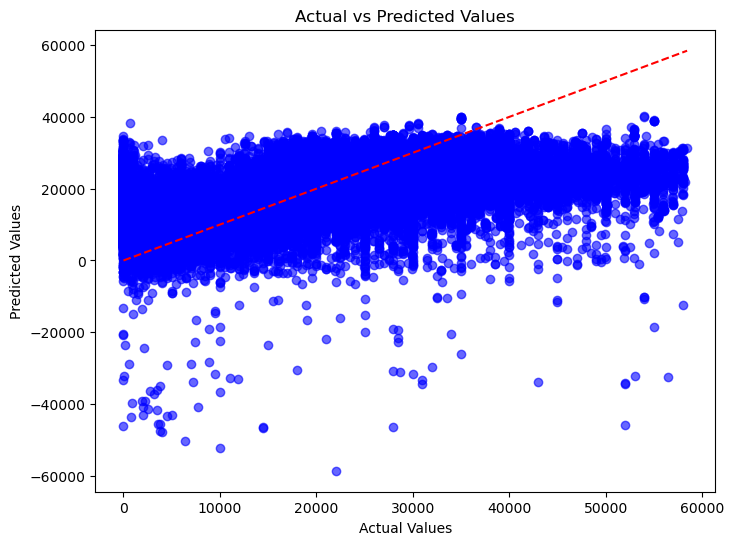

In [60]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # line for perfect predictions
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [61]:
#Ridge Regression Evaluation
ridge = Ridge(alpha=1.0)  #  alpha=1.0  is The regularization strength normally used
ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 8089.923863848514
Mean Squared Error (MSE): 115934570.13188253
R-squared (R²): 0.32823660963863854


In [62]:
#Lasso Regression Evaluation
lasso = Lasso(alpha=1.0)  #  alpha=1.0  is The regularization strength normally used
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 8090.073516370369
Mean Squared Error (MSE): 115934885.38966405
R-squared (R²): 0.32823478293038477


In [63]:
#TransformedTargetRegressor
from sklearn.compose import TransformedTargetRegressor
ttr = TransformedTargetRegressor(regressor = LinearRegression(),
                           func = np.log,
                           inverse_func = np.exp)



In [64]:
pipettr = Pipeline([('scaler', scaler),
          ('ttregressor', ttr)])

In [65]:
pipettr.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('ttregressor',
   TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                              regressor=LinearRegression()))],
 'verbose': False,
 'scaler': StandardScaler(),
 'ttregressor': TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                            regressor=LinearRegression()),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'ttregressor__check_inverse': True,
 'ttregressor__func': <ufunc 'log'>,
 'ttregressor__inverse_func': <ufunc 'exp'>,
 'ttregressor__regressor__copy_X': True,
 'ttregressor__regressor__fit_intercept': True,
 'ttregressor__regressor__n_jobs': None,
 'ttregressor__regressor__positive': False,
 'ttregressor__regressor': LinearRegression(),
 'ttregressor__transformer': None}

In [66]:
param_grid = {
    'ttregressor__regressor__fit_intercept': [True, False],
    'ttregressor__regressor__copy_X': [True, False]
}



In [67]:
grid_ttr = GridSearchCV(pipettr,
             param_grid,
             cv = 5,
             scoring = 'neg_root_mean_squared_error',error_score='raise')

In [68]:
print(y_train.describe())

count        285533.0
mean     16824.401645
std      13149.322628
min               0.0
25%            5995.0
50%           13995.0
75%           25995.0
max           58448.0
Name: price, dtype: Float64


In [69]:
print(X_train.describe())

              region           year   manufacturer          model  \
count  285533.000000  285533.000000  285533.000000  285533.000000   
mean      193.764342    2011.045851      19.112638   15769.520234   
std       117.531245       9.596943      12.112510    7476.397869   
min         0.000000    1901.000000       0.000000       0.000000   
25%        82.000000    2008.000000       8.000000   10292.000000   
50%       197.000000    2013.000000      15.000000   15852.000000   
75%       290.000000    2017.000000      29.000000   22402.000000   
max       403.000000    2022.000000      42.000000   28148.000000   

           condition      cylinders           fuel       odometer  \
count  285533.000000  285533.000000  285533.000000  285533.000000   
mean        1.456609       5.591508       3.022533   93316.061702   
std         1.413173       1.517442       0.782822   71380.473977   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       5.0000

In [70]:
grid_ttr

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ttregressor',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression()))]),
             param_grid={'ttregressor__regressor__copy_X': [True, False],
                         'ttregressor__regressor__fit_intercept': [True,
                                                                   False]},
             scoring='neg_root_mean_squared_error')

In [71]:
if (y_train <= 0).any():
    print("Target variable contains non-positive values.")

Target variable contains non-positive values.


In [72]:
y_train = y_train + 1
grid_ttr.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ttregressor',
                                        TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                   inverse_func=<ufunc 'exp'>,
                                                                   regressor=LinearRegression()))]),
             param_grid={'ttregressor__regressor__copy_X': [True, False],
                         'ttregressor__regressor__fit_intercept': [True,
                                                                   False]},
             scoring='neg_root_mean_squared_error')

In [73]:
grid_ttr.best_score_

-14706.252609081857

In [74]:
def predict_usedcar_price(carsdataset, model, preprocessor):
    """
    Function to predict the medical costs of a new patient.

    Parameters:
    - carsdataset: Dictionary with the characteristics of the used cars.
    - model: Trained model used to make the prediction.
    - preprocessor: Preprocessor used to transform the data before training the model.

    Returns:
    - Prediction of the cars sale price
    """
    # Create a DataFrame with the new patient's data
    vehicle_df = pd.DataFrame([vehicle])

    # Apply preprocessing (transform the new patient) to match the training data
    vehicle_processed = preprocessor.transform(vehicle_df)

    # Make the prediction using the trained model
    prediction = model.predict(vehicle_processed)

    return prediction[0]